# Lab One: Visualization and Data Preprocessing
### Laura Ahumada, Kevin Boyd, Shikha Pandey, Duy Nguyen
##### Southern Methodist University
##### Fall, 2022

# Business Understanding

***!! TO be updated***
+ What factors influence a person's income? Our first project for the Machine Learning course in the DataScience@SMU program was to perform an Explanatory Data Analysis with a data set of our choosing, which we chose an Adult Census Income data set. This data set was extracted from the U.S Census Bureau by Bary Becker in 1994 and is widely used on the Kaggle website. We used this data to better understand the factors that influence a person having an income of either more or less than $50,000 annually.

+ Some of the specific relations that we looked at are the statistical significances between sex versus income, and race versus income. We performed a *chi-squared test* and used it's p-value to assess and confirm the mentioned above. Another aspect that we looked at, is despite how a person can't change their gender, race and age, we should be able to see what specific education level and other achievable factors, with their specific race, age or sex, could help a person to get an income of more than $50k annually. A *two-way ANOVA* was conducted to validate that and check for statistical significance. A *PCA* was also conducted to reduce dimensions and visualize the data.

+ Given the results of these hypotheses, they can help us find the societal gaps the government should address while also giving us an idea of the important factors that can influence a person's income.

In [720]:
# Load Libraries 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import pandas as pd
import os
import seaborn as sns
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express

import warnings
warnings.filterwarnings("ignore")


In [721]:
# Import file
df=pd.read_csv("adult.csv")

# Data Understanding

## Data types
### Meaning and Type of Data
+ The original data consists of 32,561 entries/rows and 14 attributes/columns, with the response variable being "income".


| Attribute | Description | Type | Values | 
| --- | --- | --- | --- |
| age | The age of this person. | *Continuos, Ratio* | `17 - 90` 
| workclass | The employment status of this person. | *Discret, Nominal* | `Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked`
| fnlwgt | The final weight of how many people this person represents. | *Continuous, Ratio* | `12,285 - 1,484,705` 
| education | The highest level of education this person has achieved. | *Discrete, Ordinal* | `Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool` 
| education.num | Numerical form of the highest level of education this person achieved. | *Discrete, Ordinal* | `1 - 16` 
| marital.status | The marital status of this person. `Married-civ-spouse` corresponds to civilian spouse. `Married-AF-spouse` corresponds to an Armed Forces spouse. | *Discrete, Nominal* | `Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse` 
| occupation | The general type of occupation of this person. | *Discrete, Nominal* | `Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces` 
| relationship | The relation that this person identifies as in their immediate family. | *Discrete, Nominal* | `Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried` 
| race | The race of this person. | *Discrete, Nominal* | `White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black` 
| sex | The biological sex of this person. | *Discrete, Nominal* | `Female, Male` 
| capital.gain | Capital gains of this person. | *Continuous, Ratio* | `0 - 99,999` 
| capital.loss | Capital loss of this person. | *Continuous, Ratio* | `0 - 4,356` 
| hours.per.week | The number of hours this person reports to work per week.| *Continuous, Ratio* | `1 - 99` 
| native.country | The country of origin of this person. | *Discrete, Nominal* | `United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands` 
| income | The logistic classification of this person based on their income. | *Discrete, Ordinal* | `<=50k, >50k` 


In [722]:
df.shape

(32561, 15)

In [723]:
#Looking at the data
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data Quality

### Missing Values
+ We do see missing values in workclass, occupation and native.country entered as "?". 

+ Despite the "?" values taking around 5% of their respective columns "workclass", "occupation", "native.country", they were not removed due to the following reason. Census data is collected by census-takers knocking on doors and will either ask or let citizens volunteeringly write down the answer of questions about their workclass, occupation and native country, and the people may not want to report those 3 things to the government. However their incomes were still reported so it's best to treat those missing values as another category and replace them with "Unknown".

	|Column	|MissingValues|
   | --- | --- | 
	|workclass	|1836|
	|occupation	|1843|
	|native.country|	583|
    


In [725]:
# missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [726]:
# Verify missing values for categorical variables 
# FOR-LOOP
# Other than the question marks (?), this for-loop counts incorrect values based on the 
# assumption that they have less than 2 characters
# Returns a list of characters that are found
# Otherwise, return []

counter=[]
vals=[]
for i in df.select_dtypes(object).columns:
    vals.append(str(((df[df[i].str.len()<2])[i]).unique()))
    counter.append((df[df[i].str.len()<2].count())[i])
    
# creating df and filtering    
d = {'Column': df.select_dtypes(object).columns, 'MissingValues': counter}
missing=pd.DataFrame(data=d)
print(set(vals))
missing[missing["MissingValues"]!=0]


{"['?']", '[]'}


,Column,MissingValues
0,workclass,1836
3,occupation,1843
7,native.country,583


In [727]:
# Replacing question marks (?) with "Unknown"
df[['workclass','occupation','native.country']] = df[['workclass','occupation','native.country']].replace({'?':'Unknown'})


In [728]:
# Verifying that there are no "?"
counter=[]
vals=[]
for i in df.select_dtypes(object).columns:
    vals.append(str(((df[df[i].str.len()<2])[i]).unique()))
    counter.append((df[df[i].str.len()<2].count())[i])
    
# creating df and filtering    
d = {'Column': df.select_dtypes(object).columns, 'MissingValues': counter}
missing=pd.DataFrame(data=d)
print(set(vals))
missing[missing["MissingValues"]!=0]

{'[]'}


,Column,MissingValues


### Duplicates
+ We do find that there are 24 duplicate records but we will keep those entries because it makes sense that there could be a small number of people with same entries considering the categories we are given and the fact that this is census data with over 30,000 entries. 


In [729]:
#duplicates
df[df.duplicated()].count()

age               24
workclass         24
fnlwgt            24
education         24
education.num     24
marital.status    24
occupation        24
relationship      24
race              24
sex               24
capital.gain      24
capital.loss      24
hours.per.week    24
native.country    24
income            24
dtype: int64

### Outliers

+ Checking Capital gain and loss, we can see median is 0 and mean is 1077 showing just outliers. We will discuss this and how we dealt with it later on.

+ All of the values that would be considered outliers in each category are plausible and do not look like misreported data. Therefore, we will not remove any data. 

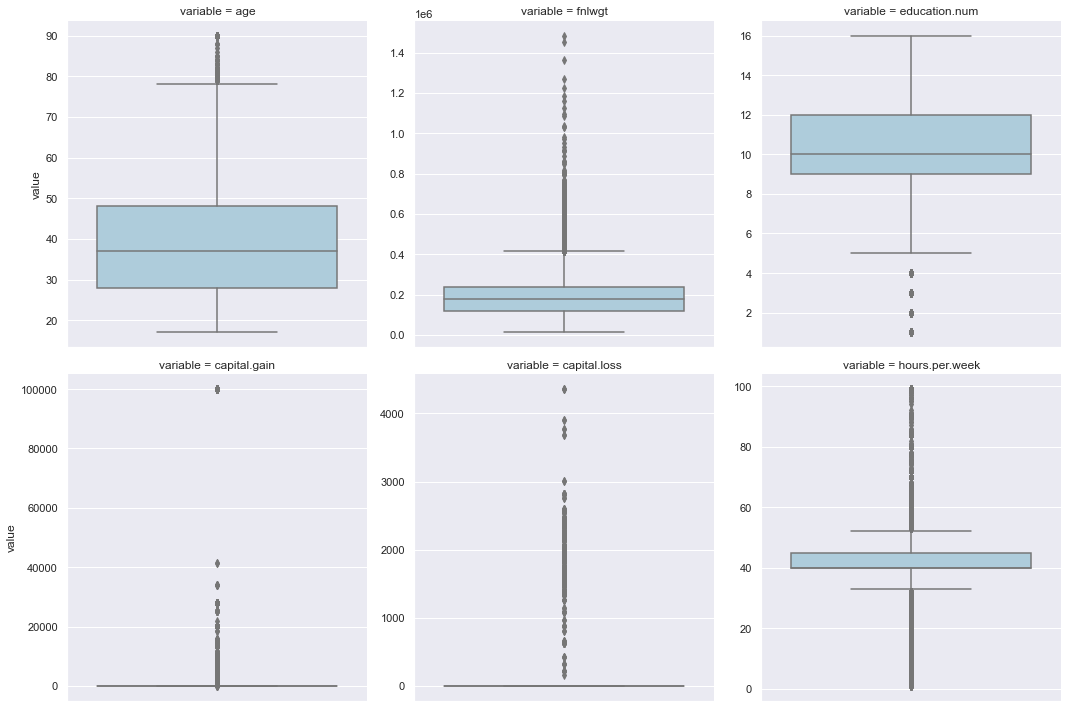

In [730]:
numdf = df._get_numeric_data()

sns.catplot(y='value', col='variable', sharey=False, col_wrap=3, 
            data=numdf.melt(), kind='box')
plt.show()

 ##  New Variables / Features

Based on the factors we have, we saw that we could segmnent age and hours worked into categories that we can use to visualize and further analyze. We also see that capital gain and capital loss have the same distribution and can be combined into a single variable as net_capital.

+ Classifying age set as "age_class"  \
    containing "Young"(0,25), "Middle-aged(26,45)", "Senior"(46-65), "Old"(66+)
+ Classifying hours worked set as "work_type" \
    containing "PartTime"(0,25), "Full_time"(25,40), "OverTime"(41-60), "Workaholic"(60+)



In [731]:
# New variables, these will also help us with graphs 
df["age_class"] =pd.cut(df["age"], bins=[15, 25, 45, 65, 100],labels = ["Young", "Middle-aged", "Senior", "Old"])
df["work_type"] =pd.cut(df["hours.per.week"], bins=[0,25,40,60,168],labels = ["PartTime", "Full_time", "OverTime", "Workaholic"])

In [732]:
# making sure the new attributes are objects to match the rest 
# later we will modify to category
for i in df.select_dtypes(include=['category']).columns:
    df[i]= df[i].astype("object")
    

## Statistics

| Continuous Variable | Range | Mean | Median | Mode | Variance |
| --- | --- | --- | --- | --- | --- |
| age | (17,90) | 38.581647 | 37 | 36 | 186.061
| fnlwgt | (1228.5,1484705) | 189778 | 178356 | 164190 & 203488 | 1.114E10
| education.num | (1,16) | 10.081 | 10 | 9 | 6.619
| capital.gain | (0,99999) | 1077.649 | 0 | 0 | 5.454E7
| capital.loss | (0,4356) | 87.304 | 0 | 0 | 1.624E5
| hours.per.week | (1,99) | 40.437 | 40 | 40 | 152.459

The summary statistics for continuous variables are described below: 
+ This points out again how Net capital median 0 while the mean is 990 which shows how skewed this variable is.
+ We can see that age has a more normal distribution, with a mean of 38 years.
+ Hours per week also has a normal distribution with mean of 40 hours and median of 40 hours.
+ For education.num we can see that it also has normal distribution with a mean of 10 and median of 10.
+ the fnlwgt also seems to have somewhat normal distribution with a mean and median around 180,000	

***Significance***
+ These statistics are important because they tell us about the distribution of the data. It can help us point out outliers, incorrect data, and the range of the continuous variables. This could also help us check assumption of normality for any downstream analysis


In [733]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


+ Checking variance

In [734]:
df.var(numeric_only=True)

age               1.860614e+02
fnlwgt            1.114080e+10
education.num     6.618890e+00
capital.gain      5.454254e+07
capital.loss      1.623769e+05
hours.per.week    1.524590e+02
dtype: float64

# Distribution of continuous data 
+ Age is a little right skewed 
+ Hours per week seem somewhat normally distributed
+ Net capital is very right skewed, mostly points around 0 

age


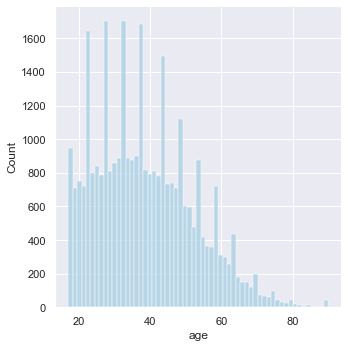

fnlwgt


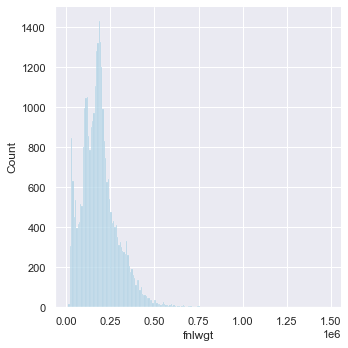

education.num


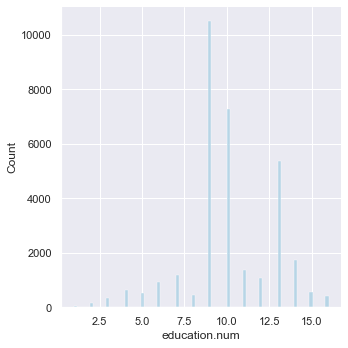

capital.gain


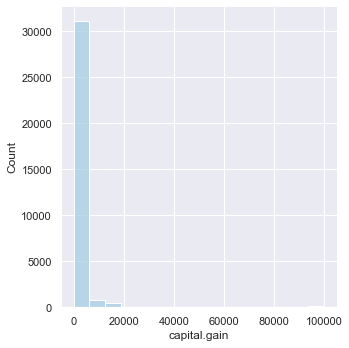

capital.loss


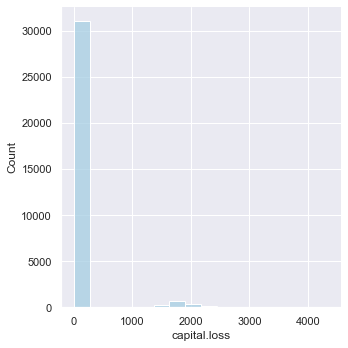

hours.per.week


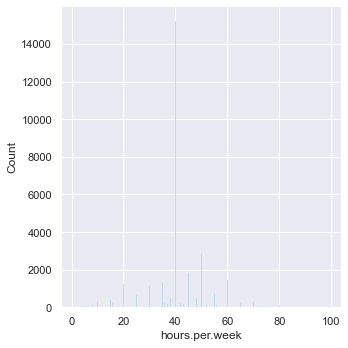

In [735]:
# for future plots
# Creating df of only Categorical variables 
cat_df=df.select_dtypes(include=['object'])

# Creating df of only Continuous variables
num_df = df._get_numeric_data()
sns.set_palette("Paired")
for i in list(num_df):
    print('\033[1m' + i) 
    sns.displot(df[i], kde=False)
    plt.show()

# Distribution of categorical data


The distribution of each of the factors seems to make sense. Below are some of the things we noticed:
+ Most people work in private companies
+ Most are married-civ-spouse followed by never married
+ Majority are white 
+ There are 6 times more husbands than wife and husbands is the largest group 
+ Above can be explained by total females being half of the total males 
+ Majority of the people are from US 
+ Most people make less than 50K. 76% of the individuals make less than 50K and only 24% make more than 50K 
+ Most people are middle aged
+ Most are full time 
+ More than half have at least graduated highschoool or higher education

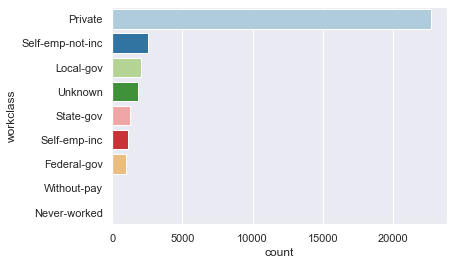

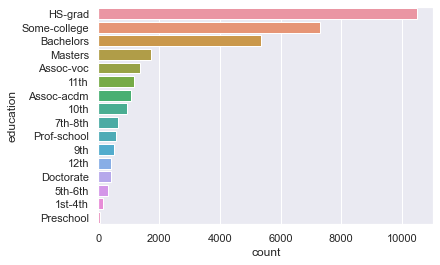

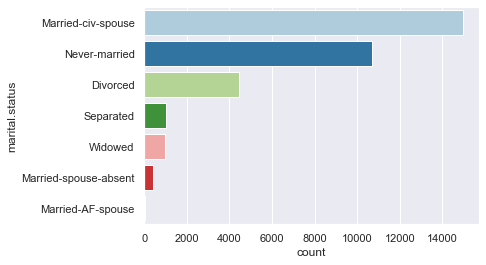

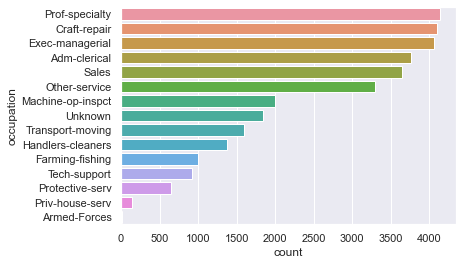

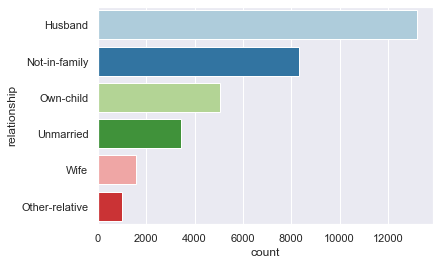

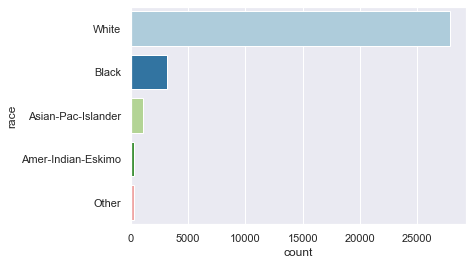

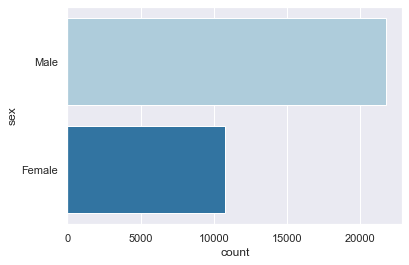

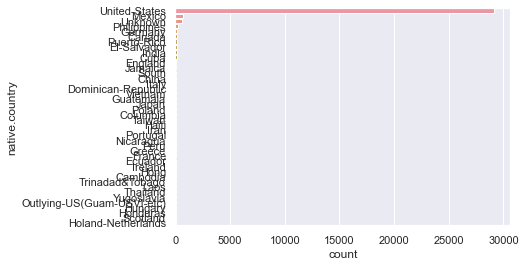

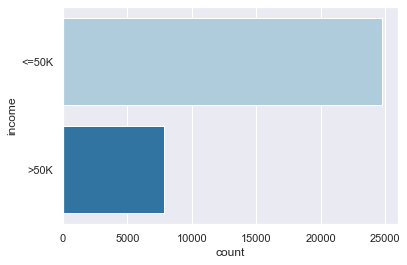

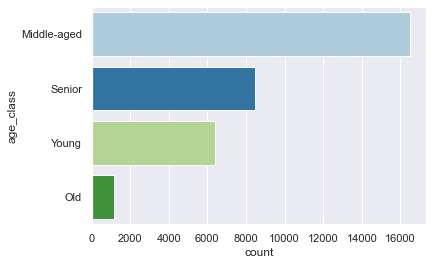

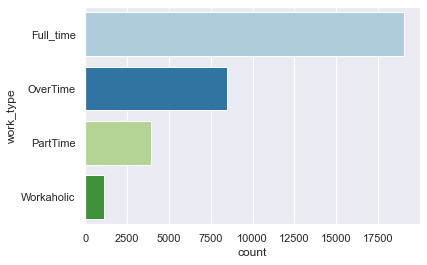

<Figure size 432x288 with 0 Axes>

In [736]:
sns.set_palette("Paired")
# Checking the distribution for each factor
for i in cat_df.columns:
    sns.countplot( y= i, data = df, orient= 'h',
    order=df[i].value_counts().index)
    plt.figure()


### After looking closer at the categorical distribution

+ 69.7% work in private companies.
+ 32.25% are highschool grads, 22.39% have some college education, and 16.44% have a Bachelor's degree. Only 5.29% have a Master's degree.
+ 46% of people entered in the data are married to a civillian, and 32.8% have never married.
+ The 3 occupation categories of professional specialty, craft repair, and executive managerial each represent 12% of all occupations.
+ 40.52% of people entered in the data are husbands, while only 4% are wives. This tells us that the husband is usually the one opening the door when US Census knocks on their door.
+ 85.43% of people are white.
+ 66.92% of people are males. This was contradicting the husbands versus wives distribution, so we digged deeper.
+ It seems like there are mistakes entered into the data but they are very minimal.
+ Almost 90% of people are native to the U.S., while 10% are from another country.
+ About a quarter of our population makes over $50,000.

# Exploring Relationships 

### We can see that people that did not graduate from highschool have lower chances for making greater than 50K regardless of sex

[Text(0.5, 1.0, 'Female')]

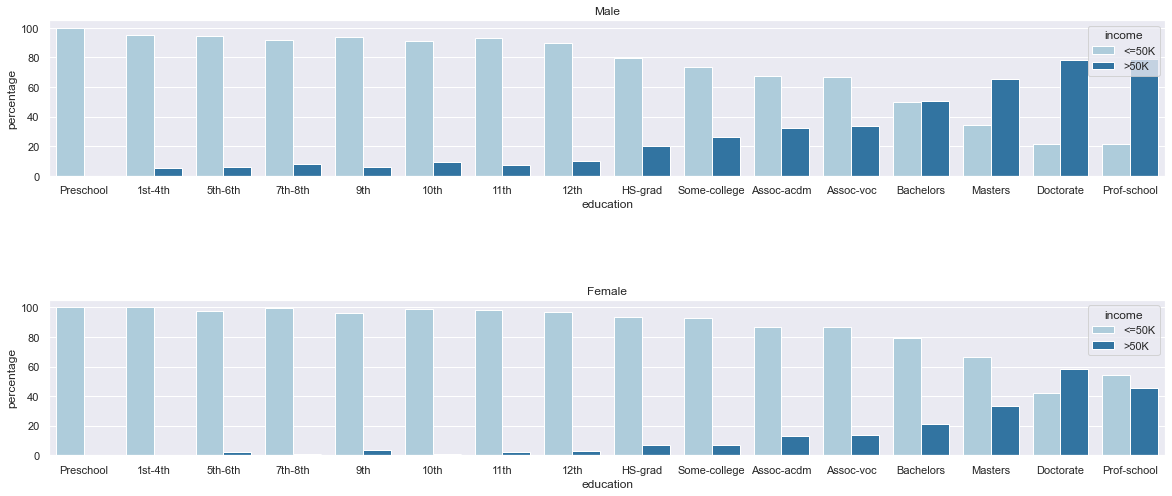

In [737]:
sns.set()
fig, axes = plt.subplots(2, 1,figsize=(20, 8))
fig.subplots_adjust(hspace=0.8, wspace=0.125)

sns.set_palette("Paired")
x, y, hue = "education", "percentage", "income"


educ_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']

n=df[df["sex"]=="Male"]
(n[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=educ_order,ax=axes[0])).set(title='Male')


n=df[df["sex"]=="Female"]
(n[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=educ_order ,ax=axes[1])).set(title='Female')


### We can see that the majority of people from 30 to 55 are more likely to have  greater than 50K

Text(0.5, 1.0, 'Percentage income per age')

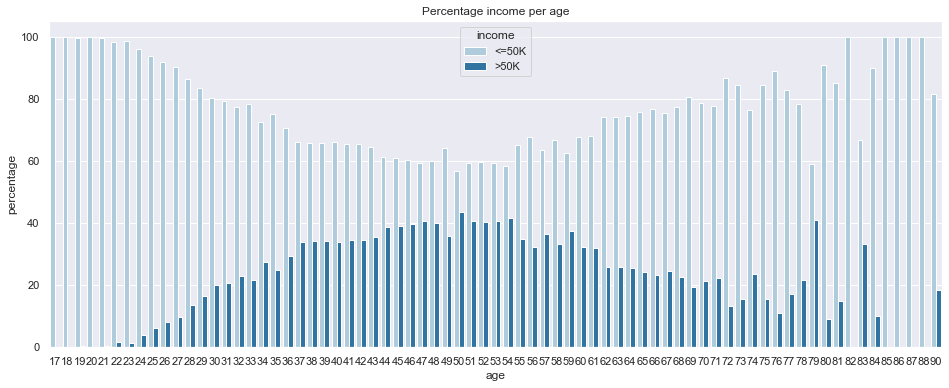

In [738]:
plt.figure(figsize=(16,6))
x, y, hue = "age", "percentage", "income"
(df[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1).rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue)).set_title("Percentage income per age")

### Correlation Plot
+ We do not see high correlation between any of our continuous variables. 
+ We see the highest correlation between education.num and hours per week with a value of 0.15. 

<AxesSubplot:>

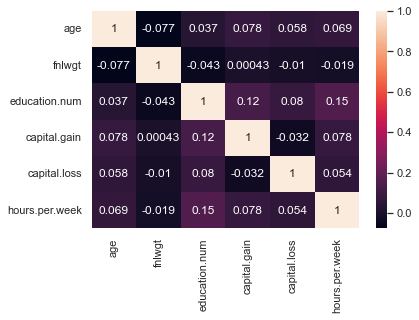

In [739]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True)

# MODEL

In [740]:
#After seeing the relationships we want to turn Native.country as Interger
# 1 representing US and 0 representing all non US countries
df['IsImmigrant'] = np.where(df['native.country']!= 'United-States', 1, 0)

#Converting the income and Male into intergers 
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int) 
df["isMale"]=[1 if (x=="Male") else 0 for x in df["sex"]]

#Deleting the variable created to view relationships and those that have been turned into new Intergers representations
df=df.drop(columns=["sex","education","work_type","age_class","native.country"])


In [741]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale
0,90,Unknown,77053,9,Widowed,Unknown,Not-in-family,White,0,4356,40,0,0,0
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,0,4356,18,0,0,0
2,66,Unknown,186061,10,Widowed,Unknown,Unmarried,Black,0,4356,40,0,0,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,0,3900,40,0,0,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,0,3900,40,0,0,0


In [742]:
#Final updates before model
modelDf=df.copy()
df_continuous = modelDf.select_dtypes(exclude=['object'])
# Standarizing variables excluding the categories(dummies)
for i in (df_continuous.columns):
    if (i !="income" and i!="IsImmigrant" and i !="isMale"):
        modelDf[i] = StandardScaler().fit_transform(modelDf[[i]])
modelDf=pd.get_dummies(modelDf, columns=modelDf.select_dtypes(include=['object']).columns)
modelDf.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale,workclass_Federal-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Suitable number of clusters

+ The Elbow plot suggested 4 clusters but after running the models with 4 clusters we realized that it wasn't a good fit by seeing that 2 of the clusters were too similar. From a practical perspective it also made sense to divide the population in 3 groups as that is how it is normally seen in society, such as upper, middle and lower class. The groups did also show to have specific attributes that distinguished each.

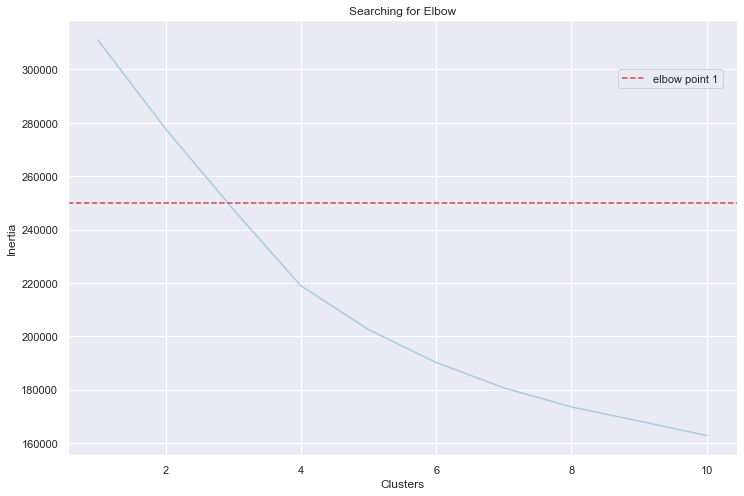

In [743]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(modelDf)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.axhline(y=250000, color ="r", linestyle="dashed", label="elbow point 1")
#ax.axhline(y=25000, color ="r", linestyle="dashed", label="elbow point 2")
plt.legend(bbox_to_anchor = (0.9, 0.9), loc = 'upper center')


plt.show()

### KNN++ models

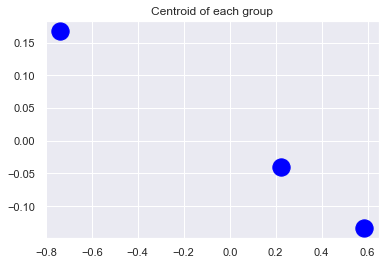

In [744]:
#Run K means clusters
X=modelDf
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

#Plotting the centroids of each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='blue', label = 'Centroids')
plt.title('Centroid of each group')
plt.xlabel('')
plt.ylabel('')
plt.show()



## Information on the groups/ Clusters
+ We see that group 1 are mostly young people that don't make greater than 50K. Their mean education is lower than the other 2 groups. The people in this group had a highest mean immigaration out of the three groups. Their investment is not as high as the other two groups. 

+ For group 0 we can see that they are older with a mean age of 46. They are actually the eldest group. Group 0 has a high capital gain and minimal capital loss which actually the biggest difference from group 2 as group 2 have a 0 capital gain but high capital loss. As for the rest of the attributes we can see that group 0 is similar to group 2 with low rate of immigrants, righ percentage of males and a high hours per week with a mean of 43.

+ Based on these groups we can see how important variable seen on our earier logistic regresion model, KNN, Random Forest among other  continued to show importance. For capital gan and loss to have been diference between 0 and 2 shows its weight. We also see age, income and education playing a role


In [746]:
df["KNNlabels"] = kmeans.labels_
df.groupby("KNNlabels").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,IsImmigrant,isMale
KNNlabels,,,,,,,,,
0,41.634097,185549.750674,10.988544,0.000000,1901.707547,43.357143,0.519542,0.092318,0.769542
1,46.558028,175657.769990,10.479061,1915.697097,0.697798,43.690263,0.390631,0.092868,0.793820
2,28.471768,207550.937375,9.495414,164.135426,0.617584,36.136500,0.027372,0.119232,0.505661


In [745]:
import plotly.graph_objects as go
import plotly.express as px

#Drop KNN label for plotting
df=df.drop("KNNlabels", axis=1)

plt.figure(figsize=(25,26))

kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=df.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
# fig.show()

<Figure size 1800x1872 with 0 Axes>

***Duy help if this part need title :)***
+ Here we can see that when filtering by age and hours per week it is only able to truly divide group 1 and 2 while not showing clear separation for group 0
+ we will now run obtain PCA components to gather all the information and reduce it to 2 PCA variable to then do the clusters and see if 3 groups are indeed the right number and if we have clear separation

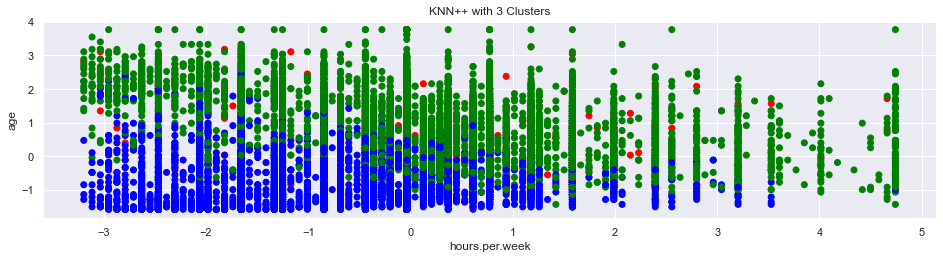

In [747]:
with plt.style.context('seaborn-bright'):
    # 3 clusters
    colors = {0:'red', 1:'green', 2:'blue'}
    plt.figure(figsize=(16, 8))
    modelDf["KNNlabels"] = kmeans.labels_
    plt.subplot(2, 1, 1)
    plt.scatter(modelDf['hours.per.week'], modelDf['age'], c=modelDf["KNNlabels"].map(colors))
    plt.title('KNN++ with 3 Clusters')
    plt.xlabel('hours.per.week')
    plt.ylabel('age')
    plt.title('KNN++ with 3 Clusters')
    plt.show()
    

## Running PCA

In [755]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

PCAdf = X.copy()
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X.values)

PCAdf['pca-one'] = pca_result[:,0]
PCAdf['pca-two'] = pca_result[:,1] 
PCAdf['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.17991287 0.11339394]


+ We have decided to stay with the first 2 principal components as they explain the most amount of data
+ Checking if the 2 PCAs are able to distinguish the education

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

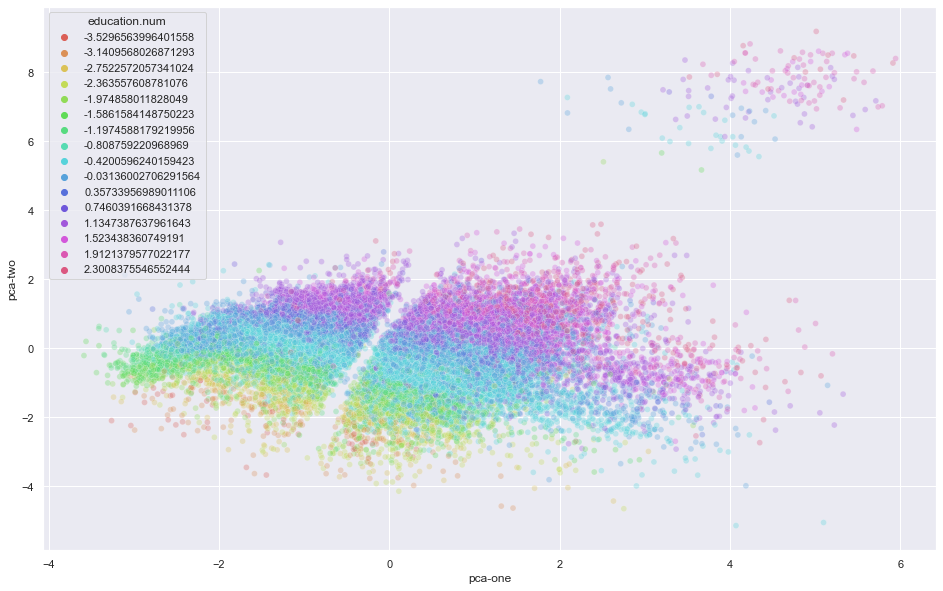

In [756]:
# For reproducability of the results
np.random.seed(42)

rndperm = np.random.permutation(PCAdf.shape[0])

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="education.num",
    palette=sns.color_palette("hls", 16),
    data=PCAdf.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

## Clustering 
+ Using the 2 Principal components obtained in PCA that gather all the information for all our variable to then use them for custering

***Kmeans***

In [833]:
#Run K means clusters
PCAdf=PCAdf[["pca-one" ,"pca-two"]]
kmeans = KMeans(n_clusters=3, random_state=0).fit(PCAdf)
kmeans.labels_
res=kmeans.predict(PCAdf)
PCAdf["results"]=res

/Users/lauraahumada/opt/anaconda3/envs/smuenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



+ Plotting the the clusters

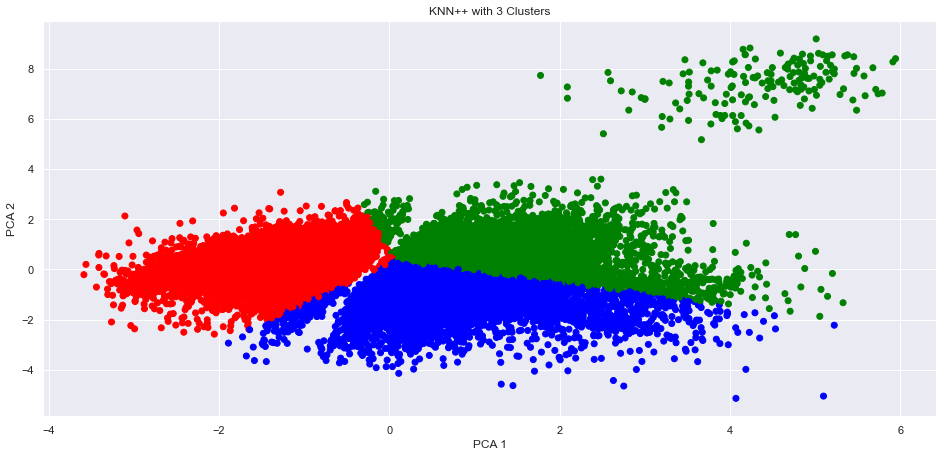

In [834]:
with plt.style.context('seaborn-bright'):
    # 3 clusters
    colors = {0:'red', 1:'green', 2:'blue'}
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.scatter(PCAdf['pca-one'], PCAdf['pca-two'], c=PCAdf['results'].map(colors))
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('KNN++ with 3 Clusters')
    plt.show()

***K Means ++***

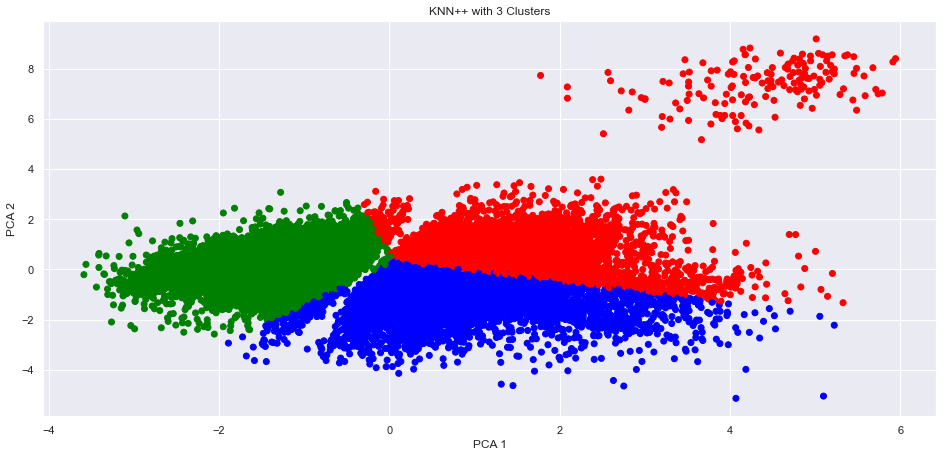

In [863]:
PCAdf=PCAdf.drop("results",axis=1)
#Performing KNN ++
model = KMeans(init='k-means++', n_clusters=3, n_init=1).fit(PCAdf)
#labels = model.labels_
PCAdf["results"]=model.predict(PCAdf)

with plt.style.context('seaborn-bright'):
    # 3 clusters
    colors = {0:'red', 1:'green', 2:'blue'}
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.scatter(PCAdf['pca-one'], PCAdf['pca-two'], c=PCAdf['results'].map(colors))
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('KNN++ with 3 Clusters')
    plt.show()


***Spectral Clustering***

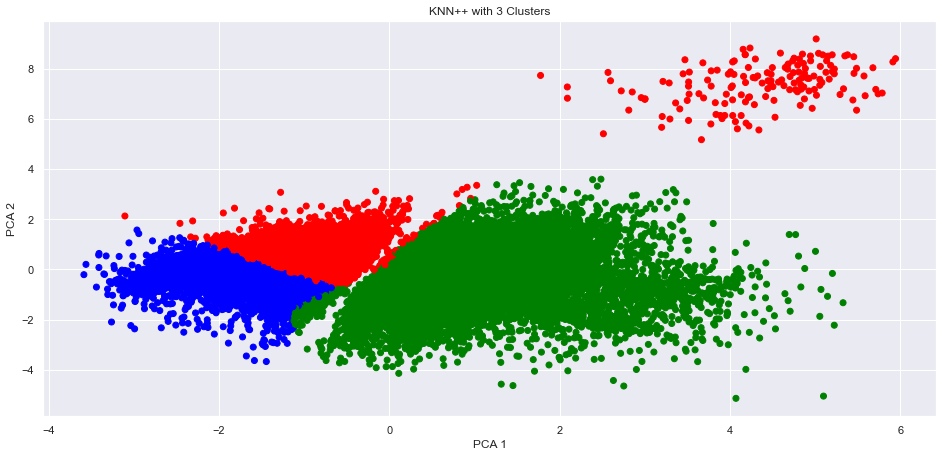

In [838]:
PCAdf=PCAdf.drop("results",axis=1)
from sklearn.cluster import SpectralClustering
spc = SpectralClustering(n_clusters=3, affinity = 'nearest_neighbors')
PCAdf["results"]=spc.fit_predict(PCAdf)

with plt.style.context('seaborn-bright'):
    # 3 clusters
    colors = {0:'red', 1:'green', 2:'blue'}
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.scatter(PCAdf['pca-one'], PCAdf['pca-two'], c=PCAdf['results'].map(colors))
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('KNN++ with 3 Clusters')
    plt.show()

***DBSCAN Clustering***

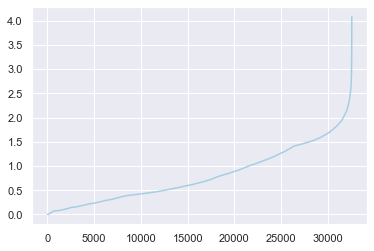

In [846]:
#Choosing best eps
from sklearn.neighbors import NearestNeighbors
# Determining optimal epsilon
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
#plt.axis([31000, 33000, 0, 0.001])

In [848]:
model = DBSCAN(eps=1.7, min_samples=4).fit(PCAdf)
set(model.labels_)

{0, 1}

/Users/lauraahumada/opt/anaconda3/envs/smuenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



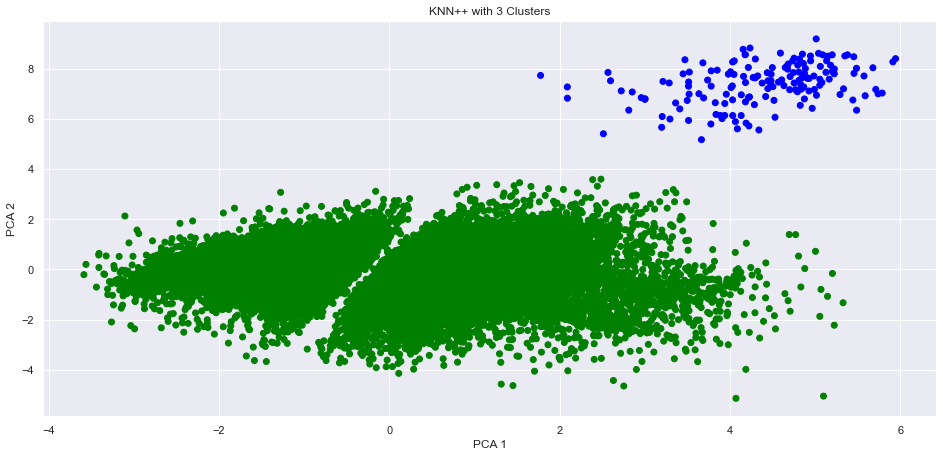

In [850]:
PCAdf=PCAdf.drop("results",axis=1)
#Peforming DBSCAN
n_clusters = 3
model = DBSCAN(eps=1.7, min_samples=4).fit(PCAdf)
PCAdf["results"]=model.fit_predict(PCAdf)

with plt.style.context('seaborn-bright'):
    # 3 clusters
    colors = {0:'green', 1:'blue'}
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.scatter(PCAdf['pca-one'], PCAdf['pca-two'], c=PCAdf['results'].map(colors))
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('KNN++ with 3 Clusters')
    plt.show()


In [867]:
PCAdf.columns

Index(['pca-one', 'pca-two'], dtype='object')

In [ ]:
#if model below does not work and has a color error uncomment bellow and make sure it matches with colors
#model_labels


In [ ]:
PCAdf=PCAdf.drop("results",axis=1)
model = AgglomerativeClustering(linkage='ward', n_clusters=3)
PCAdf["results"]=model.predict(PCAdf)
##PCAdf["results"]=model.fit_predict(PCAdf)

with plt.style.context('seaborn-bright'):
    # 3 clusters
    colors = {0:'green', 1:'blue'}
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.scatter(PCAdf['pca-one'], PCAdf['pca-two'], c=PCAdf['results'].map(colors))
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('KNN++ with 3 Clusters')
    plt.show()

Option A: Cluster Analysis 
• Perform cluster analysis using several clustering methods - Completed
• How did you determine a suitable number of clusters for each method? - Completed--Writting missin
• Use internal and/or external validation measures to describe and compare the 
clusterings and the clusters (some visual methods would be good). -***Ask professor***
• Describe your results. What findings are the most interesting and why?  writting missing

Deployment (10 points total) 
• Be critical of your performance and tell the reader how you current model might be usable by 
other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? 
• How useful is your model for interested parties (i.e., the companies or organizations 
that might want to use it)? 
• How would your deploy your model for interested parties?  
• What other data should be collected?  
• How often would the model need to be updated, etc.? 

In [ ]:
#Extra

# Trying TSNE instead of PCA

In [469]:
N = 10000

df_subset = modelDf.loc[rndperm[:N],:].copy()

data_subset = df_subset.values

import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/Users/lauraahumada/opt/anaconda3/envs/smuenv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/lauraahumada/opt/anaconda3/envs/smuenv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 4.380s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.819596
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.330185
[t-SNE] KL divergence after 300 iterations: 2.881605
t-SNE done! Time elapsed:

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

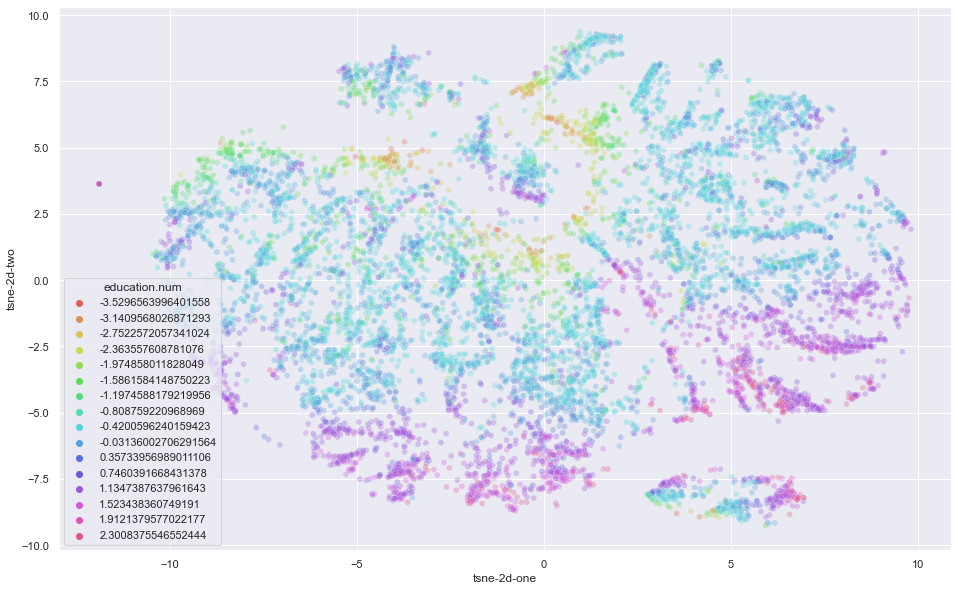

In [473]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="education.num",
    palette=sns.color_palette("hls", 16),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [ ]:

# Agglomarative clustering
n_clusters = 5  # number of regions
model = AgglomerativeClustering(linkage='ward',
                                n_clusters=n_clusters)
model.fit(x)

# Agglomarative clustering
n_clusters = 5  # number of regions
model = AgglomerativeClustering(linkage='single',
                                n_clusters=n_clusters)
model.fit(x)

# Agglomarative clustering
n_clusters = 5  # number of regions
model = AgglomerativeClustering(linkage='average',
                                n_clusters=n_clusters)
model.fit(x)